In [39]:
include("src/Utils.jl")
include("src/Simulator.jl")

In [48]:
#The type of Proof-of-Stake: Weighted, OppositeWeighted, GiniStabilized
proof_of_stake = Weighted

#The number of agents in the blockchain
n_agents = 10000

#The initial volume of stakes in the pool
initial_stake_volume = 50.0

#Number of epochs to be simulated
n_epochs = 100000

#Constant reward earned by the validator
reward = 1.0

#Probability of a new peer to join the pool at any epoch
prob_new_entry = 0.001

#Probability of a peer to quit the pool at any epoch
prob_leaving = 0.001

#Target value for GiniStabilized PoS
θ = 0.3

#The initial distribution of tokens: Uniform, Gini
initial_distribution = Gini
;

In [49]:
stakes = generate_peers(n_agents, initial_stake_volume, Gini, 0.3);

In [50]:
history_collection = ThreadSafeDict()

simulations = 1

@Threads.threads for i in 1:simulations
    history_collection[i] = simulate(proof_of_stake, stakes, θ, reward);
end

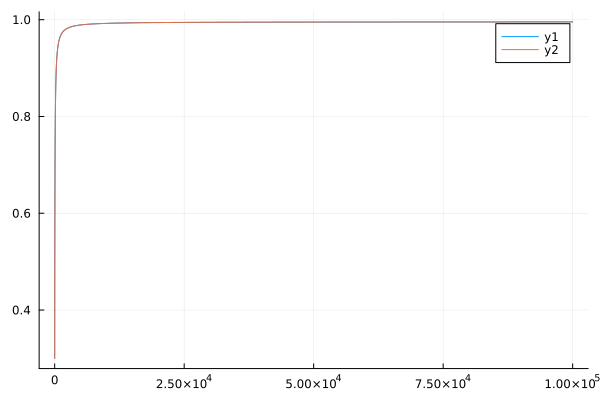

In [51]:
plot(history_collection[1])
for i in 2:simulations - 1
    plot!(history_collection[i])
end
plot!(history_collection[simulations])